In [0]:
# Load data
from google.colab import drive
drive.mount('/content/gdrive')
directory = '/content/gdrive/My Drive/ColorNetData/'

from pickle import load
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb, rgb2gray, gray2rgb
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.preprocessing.image import load_img, img_to_array

inception = load(open(directory + 'inception.p', 'rb'))
model = load(open(directory + 'final_model.p', 'rb'))
model.load_weights(directory + 'weights.h5')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [0]:
# Method for prediction
def predict(name):
  # Image embedding
  filename = directory + name
  image = load_img(filename, target_size=(299, 299))
  image = np.array(img_to_array(image), dtype=float)
  print('Original')
  plt.imshow(image/255)
  plt.show()
  image = gray2rgb(rgb2gray(image))
  image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
  image = preprocess_input(image)
  embed_input = inception.predict(image)
  
  # Encoded image
  image = np.array(img_to_array(load_img(filename, target_size=(256, 256))), dtype=float)
  encoded_image = rgb2lab(1.0/255*image)[:, :, 0]
  encoded_image = encoded_image.reshape(1, encoded_image.shape[0], encoded_image.shape[1], 1)
  
  # Prediction
  output_image = model.predict([encoded_image, embed_input])
  output_image = output_image*128
  canvas = np.zeros((256, 256, 3))
  canvas[:, :, 0] = encoded_image[0][:, :, 0]
  canvas[:, :, 1:] = output_image[0]
  output = lab2rgb(canvas)
  
  return output

Predicted
Original


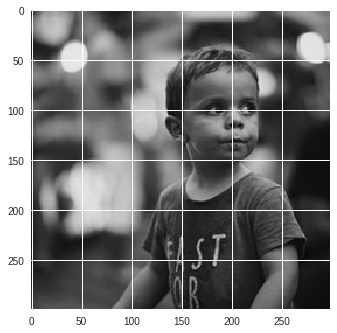

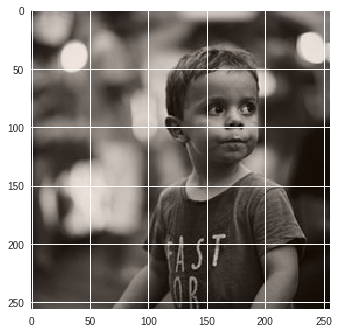

In [0]:
print('Predicted')
output = predict('sample.jpg')
plt.imshow(output)
plt.show()